# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Adeyemi Toba

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [2]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            Version
------------------ ----------
annotated-types    0.6.0
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
confection         0.1.4
cymem              2.0.8
html5lib           1.1
idna               3.6
Jinja2             3.1.3
joblib             1.3.2
langcodes          3.3.0
MarkupSafe         2.1.5
murmurhash         1.0.10
nltk               3.8.1
numpy              1.26.4
packaging          24.0
pip                24.0
preshed            3.0.9
pydantic           2.6.4
pydantic_core      2.16.3
regex              2023.12.25
requests           2.31.0
setuptools         69.2.0
six                1.16.0
smart-open         6.4.0
soupsieve          2.5
spacy              3.7.4
spacy-legacy       3.0.12
spacy-loggers      1.0.5
spacytextblob      4.0.0
srsly              2.4.8
textblob           0.15.3
thinc 

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

## Question 1

In [3]:
import requests

response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

print(response.status_code)
print(response.headers['content-type'])


200
text/html; charset=UTF-8


In [10]:
import requests
from bs4 import BeautifulSoup
import pickle

parser = 'html.parser'

soup = BeautifulSoup(response.text, parser)

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text



with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)

    soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')

print(article_element)

<article class="post-466450 post type-post status-publish format-standard has-post-thumbnail hentry category-car-hacks category-engineering category-featured category-laser-hacks category-slider tag-laser tag-laser-headlight tag-laser-headlights tag-light" id="post-466450" itemscope="" itemtype="http://schema.org/Article">
<header class="entry-header">
<h1 class="entry-title" itemprop="name">How Laser Headlights Work</h1>
<div class="entry-meta">
<a class="comments-counts" href="https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/#comments"><span class="icon-hackaday icon-hackaday-comment"></span>
                130 Comments            </a>
<ul class="meta-authors vcard author">
<li>by:</li>
<span class="fn"><a class="author url fn" href="https://web.archive.org/web/20210327165005/https://hackaday.com/author/lewinday/" rel="author" title="Posts by Lewin Day">Lewin Day</a></span>
</ul>
</div><!-- .entry-meta -->
<div class="entry-meta en

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

## Question 2

In [11]:
from bs4 import BeautifulSoup
import pickle

with open("python-match.pkl", "rb") as f:
    html_content = pickle.load(f)

soup = BeautifulSoup(html_content, "html.parser")

article_element = soup.find("article")

article_text = article_element.get_text()

print(article_text)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

## Question 3

In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_element.get_text())
t = [token.text.lower() for token in doc if token.is_stop != True and token.is_punct != True and token.is_space != True]   
print(t)

['laser', 'headlights', 'work', '130', 'comments', 'lewin', 'day', 'march', '22', '2021', 'think', 'onward', 'march', 'automotive', 'technology', 'headlights', 'usually', 'thing', 'come', 'mind', 'engines', 'fuel', 'efficiency', 'switch', 'electric', 'power', 'mind', 'mean', 'thousands', 'engineers', 'world', 'working', 'improve', 'state', 'art', 'automotive', 'lighting', 'day', 'day', 'sealed', 'beam', 'headlights', 'gave', 'way', 'modern', 'designs', 'regulations', 'loosened', 'bulbs', 'moved', 'simple', 'halogens', 'xenon', 'hids', 'recently', 'leds', 'new', 'technology', 'scene', 'lasers', 'laser', 'headlights', 'bwm', 'prototype', 'laser', 'headlight', 'assemblies', 'undergoing', 'testing', 'image', 'brought', 'mind', 'phrase', 'laser', 'headlights', 'laser', 'beams', 'firing', 'automobile', 'obviously', 'coherent', 'beams', 'monochromatic', 'light', 'poor', 'illumination', 'outside', 'specific', 'spot', 'distance', 'away', 'thankfully', 'eyes', 'laser', 'headlights', 'work', 'way

In [15]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
doc = nlp(article_element.get_text())
from collections import Counter

def important_token(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.text.lower() for token in doc if important_token(token)]
word_freq = Counter(map(str,interesting_tokens))
best_token = (word_freq.most_common(5))
print(best_token)
best_tokens = set()
for token, freq in word_freq.most_common(5):
    best_tokens.add(token)
print(best_tokens)

[('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]
{'technology', 'laser', 'led', 'headlight', 'headlights'}


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

## Question 4

In [19]:
interesting_lemmas = [token.lemma_.lower() for token in doc if important_token(token)]
lemma_freq = Counter(interesting_lemmas)
best_lemmas= lemma_freq.most_common(5)
print(best_lemmas)
best_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    best_lemmas.add(lemma)
print(best_lemmas)

[('laser', 40), ('headlight', 28), ('beam', 12), ('technology', 10), ('light', 10)]
{'technology', 'laser', 'beam', 'headlight', 'light'}


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

## Question 5

In [21]:
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = sentence.split()
    score = sum(1 for token in tokens if token.lower() in interesting_tokens) / len(tokens)
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc]
    score = sum(1 for lemma in lemmas if lemma in interesting_lemmas) / len(lemmas)
    return score

first_sentence = "Laser headlights offer several advantages over traditional headlights."
interesting_tokens = ["laser", "headlights", "advantages"]
interesting_lemmas = ["laser", "headlight", "offer", "several", "advantage", "traditional"]

token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

print("Token score:", token_score)
print("Lemma score:", lemma_score)

Token score: 0.375
Lemma score: 0.7777777777777778


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 6

In [27]:
for sentence in sentences:
    count1= 0
    for token in sentence:
        if token.text.lower() in best_tokens:
            count1+= 1
    count2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count2 += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count1/count2,':',sent_str)
plt.show()

0.16666666666666666 : How Laser Headlights Work        130 Comments      by:Lewin DayMarch 22, 2021
0.09523809523809523 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
0.0 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
0.0 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
0.038461538461538464 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
0.25 : Now, a new technology is on the scene, with lasers!Laser Headlights?!
0.25 : BWM’s prototype laser headlight assemblies undergoing testing.
0.13043478260869565 : The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile.
0.0 : Obviou

In [28]:
tscores = []
for sentence in sentences:
    count1= 0
    for token in sentence:
        if token.text.lower() in best_tokens:
            count1 += 1
    count2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count2 += 1
    score = count1 / count2 if count2 > 0 else 0
    tscores.append(score)

print("TokensLIST =", tscores)

TokensLIST = [0.16666666666666666, 0.09523809523809523, 0.0, 0.0, 0.038461538461538464, 0.25, 0.25, 0.13043478260869565, 0.0, 0.14285714285714285, 0.25, 0.0, 0.045454545454545456, 0.2222222222222222, 0.0, 0.1875, 0.15, 0.09090909090909091, 0.07692307692307693, 0.05263157894736842, 0.0, 0.045454545454545456, 0.05660377358490566, 0.0, 0.03333333333333333, 0.29411764705882354, 0.05555555555555555, 0.0, 0.14285714285714285, 0.15151515151515152, 0.05263157894736842, 0.05555555555555555, 0.12903225806451613, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.07142857142857142, 0.0, 0.0, 0.04, 0.05555555555555555, 0.125, 0.07317073170731707, 0.03225806451612903, 0.08333333333333333, 0.1111111111111111, 0.04, 0.12, 0.06060606060606061, 0.08695652173913043, 0.07407407407407407, 0.0, 0.0, 0.4]


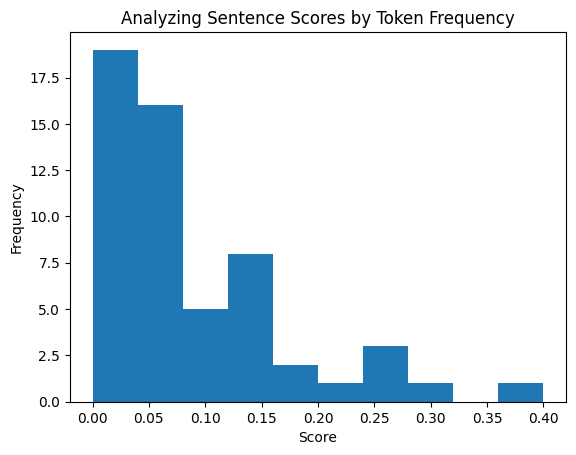

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Plot histogram
plt.hist(tscores)
plt.title('Analyzing Sentence Scores by Token Frequency')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)

## Question 7

In [32]:
sentences = list(doc.sents)
for sentence in sentences:
    count1= 0
    for lemma in sentence:
        if lemma.lemma_.lower() in best_lemmas:
            count1+= 1
    count2 = 0
    for lemma in sentence:
        if not(lemma.is_space or lemma.is_punct):
            count2 += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count1/count2,':',sent_str)

0.08333333333333333 : How Laser Headlights Work        130 Comments      by:Lewin DayMarch 22, 2021
0.09523809523809523 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
0.0 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
0.0 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
0.07692307692307693 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
0.25 : Now, a new technology is on the scene, with lasers!Laser Headlights?!
0.25 : BWM’s prototype laser headlight assemblies undergoing testing.
0.17391304347826086 : The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile.
0.09523809523

In [47]:
lscores1 = []

for sentence in sentences:
    count1 = 0
    for token in sentence:
        if token.lemma_.lower() in best_lemmas:
            count1 += 1
    
    count2 = 0
    for token in sentence:
        if not (token.is_space or token.is_punct):
            count2 += 1
    
    score = count1 / count2 if count2 > 0 else 0
    lscores1.append(score)


print("LemmasLIST =", lscores1)

asLIST =", lscores1)

SyntaxError: unterminated string literal (detected at line 23) (1443954781.py, line 23)

In [48]:
plt.hist(lscores1)
plt.title('Frequency of Sentence Scores Using Lemmas')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

NameError: name 'lscores1' is not defined

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

## Question 8

def score_sentence_by_token(sentence, interesting_tokens):
    tokens = sentence.split()
    score = sum(1 for token in tokens if token.lower() in interesting_tokens and nlp(token)[0].pos_ == 'NOUN') / len(tokens)
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if token.pos_ == 'NOUN']
    score = sum(1 for lemma in lemmas if lemma in interesting_lemmas) / len(lemmas)
    return score

interesting_nouns_tokens = [token.lower() for token, _ in most_common_tokens if nlp(token)[0].pos_ == 'NOUN']
interesting_nouns_lemmas = [lemma.lower() for lemma, _ in most_common_lemmas if nlp(lemma)[0].pos_ == 'NOUN']